# Reading Libraries and Datasets

In [25]:
import pandas as pd
import os
import sweetviz as sv
import geopandas as gpd
from shapely import wkt
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import geodatasets
from geopy.geocoders import Nominatim
import warnings
import plotly.express as px
from geopy.geocoders import ArcGIS
import geopandas as gpd
import re
warnings.filterwarnings('ignore')

In [26]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Capstone Project/Databases')

In [27]:
directory_contents = os.listdir('.')
directory_contents

['dataframe_withlocations.csv',
 'db_filtered_NoNAs.csv',
 'db_filtered_wNAs.csv',
 'ODBus_v1.csv',
 'Other Databases',
 'sample.csv',
 'toronto data.csv',
 'toronto_df_locations.csv',
 'vancouver data.csv']

In [28]:
df=pd.read_csv("dataframe_withlocations.csv").drop(columns=['Unnamed: 0'])
df.head()

,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city
0,MOBILE VENDING (FOOD TRUCK),R54-4422459,NaN,2014-05-16,"AHMADZADEH-RAZAVI, MAHNAZ",NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-08-16,2015-08-16,"canada,l6p",43.794049,-79.702103,"L6P, Brampton, Ontario","L6P, Brampton, Ontario",Brampton
1,MOBILE VENDING (FOOD TRUCK),R54-4422376,NaN,2014-05-15,TANG'S FAMILY RESTAURANT CORP,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-09-10,2015-09-10,"3380 midland ave, #19,toronto, on,canada,m1v 5b5",43.809303,-79.290346,"3380 Midland Ave, Unit 19, Scarborough, Ontari...","3380 Midland Ave, Unit 19, Scarborough, Ontari...",Scarborough
2,MOBILE VENDING (FOOD TRUCK),R54-4424708,NaN,2014-07-09,"INSRICHIENGMAI, SUSAN",NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-10-08,2015-10-08,"canada,m6k",43.637944,-79.429962,"M6K, Toronto, Ontario","M6K, Toronto, Ontario",Toronto
3,MOBILE VENDING (FOOD TRUCK),R54-4422377,NaN,2014-05-15,1459949 ONTARIO INC,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2016-01-06,2016-01-06,"90 esna park dr, #22,markham, on,canada,l3r 2r7",43.827610,-79.338622,"90 Esna Park Dr, Unit 22, Markham, Ontario, L3...","90 Esna Park Dr, Unit 22, Markham, Ontario, L3...",Markham
4,MOBILE VENDING (FOOD TRUCK),R54-4422545,NaN,2014-05-20,2397349 ONTARIO INC,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2016-01-06,2016-01-06,"1621 skyline dr,mississauga, on,canada,l5e 2w9",43.599759,-79.558298,"1621 Skyline Dr, Mississauga, Ontario, L5E 2W9","1621 Skyline Dr, Mississauga, Ontario, L5E 2W9",Mississauga


In [29]:
df[(~df['Conditions'].isna())]

,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city
26,MOBILE VENDING (FOOD TRUCK),R54-4536668,NaN,2015-05-19,FLASH TRANS INC,SOFT ICE CREAM;,NaN,NaN,MOBILE VENDING (FOOD TRUCK) 6-MONTH;,2016-11-14,2017-09-08,"157 ashdale ave,toronto, on,canada,m4l 2y8",43.669616,-79.320466,"157 Ashdale Ave, Toronto, Ontario, M4L 2Y8","157 Ashdale Ave, Toronto, Ontario, M4L 2Y8",Toronto
54,MOBILE VENDING (FOOD TRUCK),R54-4532517,NaN,2015-02-06,2437252 ONTARIO INC,FRENCH FRIES;HAMBURGERS;HOT DOGS;,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2017-10-10,2017-10-10,"89 lucena cres,maple, on,canada,l6a 2w4",43.838199,-79.529323,"89 Lucena Cres, Maple, Ontario, L6A 2W4","89 Lucena Cres, Maple, Ontario, L6A 2W4",Maple
311,MOBILE VENDING (ICE CREAM TRUCK),R56-4537588,NaN,2015-06-08,2411495 ONTARIO INC,SOFT ICE CREAM;,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) 6-MONTH;,2016-09-11,2016-09-11,"50 edgehill ave,stouffville, on,canada,l4a 1s6",43.971203,-79.224221,"50 Edgehill Ave, Stouffville, Ontario, L4A 1S6","50 Edgehill Ave, Stouffville, Ontario, L4A 1S6",Stouffville
759,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-2023674,NaN,1995-12-29,"FABBRI, GAETANO",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;,NaN,NaN,RV - MOTORIZED - PROPANE HEATER;,2003-02-06,2003-02-06,"canada,l3s",43.848369,-79.260909,"L3S, Markham, Ontario","L3S, Markham, Ontario",Markham
765,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3103806,NaN,1999-12-23,"SHARMA, VINOD KUMAR",COLD DRINKS;SANDWICHES;SAUSAGES;HAMBURGERS;HOT...,"CIGARETTES,NEWSPAPERS",NaN,RV - MOTORIZED - PROPANE HEATER;,2003-02-07,2003-02-07,"canada,m4j",43.686524,-79.336682,"M4J, Toronto, Ontario","M4J, Toronto, Ontario",Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5338382,GOOD BEHAVIOUR ICE CREAM,2023-07-20,GOOD BEHAVIOUR ICE CREAM INC,MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;P...,NaN,NaN,RV - NON-MOTORIZED - ICE CREAM;,NaN,2023-07-20,"393 woodfield rd,toronto, on,canada,m4l 2x2",43.674600,-79.324858,"393 Woodfield Rd, Toronto, Ontario, M4L 2X2","393 Woodfield Rd, Toronto, Ontario, M4L 2X2",Toronto
3328,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5345989,CHURROS BY REBOZOS,2023-08-04,CHURROS BY REBOZOS INC,MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,ALSO SELLING TACOS AND QUESADILLAS,NaN,RV - NON-MOTORIZED - PROPANE HEATER;,NaN,2023-10-27,"126 rogers rd,toronto, on,canada,m6e 1p7",43.684813,-79.449630,"126 Rogers Rd, York, Ontario, M6E 1P7","126 Rogers Rd, York, Ontario, M6E 1P7",York
3329,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5349014,FAST FOOD CART,2023-09-15,"BASHARDOST, FOLURA",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,NaN,NaN,RV - NON-MOTORIZED - PROPANE HEATER;,NaN,2023-09-15,"canada,m1s",43.794119,-79.265591,"M1S, Toronto, Ontario","M1S, Toronto, Ontario",Toronto
3330,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5377789,BEE BOX FOODS,2023-12-18,"BALDEO, PETER TONY",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,NaN,NaN,RV - TRAILER - ELECTRIC;,NaN,2023-12-18,"canada,m2n",43.767597,-79.410276,"M2N, Toronto, Ontario","M2N, Toronto, Ontario",Toronto


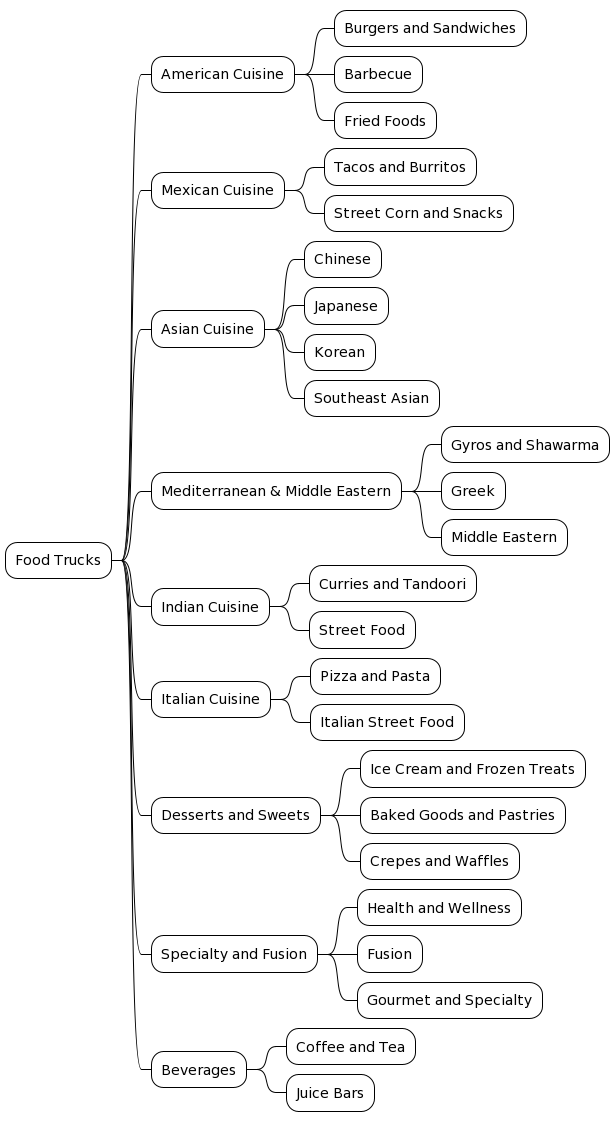

In [31]:
df.groupby('Endorsements').count()['Licence No.']

Endorsements
MOBILE VENDING (FOOD TRUCK) 6-MONTH;         227
MOBILE VENDING (FOOD TRUCK) 9-MONTH;          20
MOBILE VENDING (FOOD TRUCK) ANNUAL;           33
MOBILE VENDING (ICE CREAM TRUCK) 6-MONTH;    433
MOBILE VENDING (ICE CREAM TRUCK) 9-MONTH;     11
MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;      35
RV - MOTORIZED - ICE CREAM;                  410
RV - MOTORIZED - NATURAL GAS HEATER;           3
RV - MOTORIZED - NO HEATER;                   68
RV - MOTORIZED - PROPANE HEATER;             939
RV - NON-MOTOR. (NOT PROPANE/ICE CREAM);      51
RV - NON-MOTORIZED - ICE CREAM;              111
RV - NON-MOTORIZED - PROPANE HEATER;         894
RV - TRAILER - ELECTRIC;                      20
RV - TRAILER - NATURAL GAS HEATER;             3
RV - TRAILER - PROPANE HEATER;                72
RV - TRAILER - WOOD-FIRED;                     2
Name: Licence No., dtype: int64

# Inferring Categories Using LLMs

In [32]:
import openai
import os
import json

# Open the JSON file
with open('/Users/edwin/Repositories/api_keys.json') as file:
    data = json.load(file)

# Access the API keys
openai.api_key= data['apiKeys']['OpenAI2']

In [398]:
def get_completion(prompt, model="gpt-4",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [34]:
df.columns

Index(['Category', 'Licence No.', 'Operating Name', 'Issued', 'Client Name',
       'Conditions', 'Free Form Conditions Line 1',
       'Free Form Conditions Line 2', 'Endorsements', 'Cancel Date',
       'Last Record Update', 'address', 'latitude', 'longitude',
       'formatted_address', 'location', 'city'],
      dtype='object')

## Example of inferring

In [177]:
n=206
operating_name=str(df['Operating Name'][n])
client_name=str(df['Client Name'][n])
conditions=str(df['Conditions'][n])
free_form_cond1=str(df['Free Form Conditions Line 1'][n])
free_form_cond2=str(df['Free Form Conditions Line 2'][n])
print(operating_name,client_name,conditions,free_form_cond1,free_form_cond2)

nan NANIS GELATO FOOD TRUCK INC nan nan nan


In [399]:
prompt= f"""
Given the information about a business, infer the appropriate category and subcategory 
for the business primarily based on its Operating Name. If the Operating Name does not 
provide a clear indication, proceed to analyze the Client Name. If it is still unclear, 
then use the Conditions or the Free Form Conditions for guidance. 
If the information provided does not allow for a clear categorization, 
mark the category or subcategory as 'Unknown'.

The output instructions are inside the the following triple backticks:
'''
The output should be formatted as: Category - Subcategory

For example: '''Asian Cuisine - Japanese'''
Do not add any additional information in the output or any of the tag names like "Category 1" or "Subcategories 1".
'''

The categories and subcategories are inside the following triple backticks:
'''
- American Cuisine
  - Burgers and Sandwiches
  - Barbecue
  - Fried Foods
  - Other American Food

- Canadian Cuisine
  - Poutine
  - Canadian Bacon or Peameal Bacon
  - Butter Tarts
  - Maple Syrup Products
  - Other Canadian Food

- Mexican Cuisine
  - Tacos and Burritos
  - Street Corn and Snacks
  - Other Mexican Food

- Asian Cuisine
  - Chinese
  - Japanese
  - Korean
  - Southeast Asian
  - Other Asian Food

- Mediterranean & Middle Eastern
  - Gyros and Shawarma
  - Greek
  - Middle Eastern
  - Other Mediterranean Food

- Indian Cuisine
  - Curries and Tandoori
  - Street Food
  - Other Indian Food

- Italian Cuisine
  - Pizza and Pasta
  - Italian Street Food
  - Other Italian Food

- Desserts and Sweets
  - Ice Cream and Frozen Treats
  - Baked Goods and Pastries
  - Crepes and Waffles
  - Other Desserts

- Beverages
  - Coffee and Tea
  - Juice Bars
  - Other Beverages

- Other international food
  - African Cuisine
  - South American Cuisine
  - Central American Cuisine
  - Caribbean Cuisine
  - European Cuisine
  - Oceanian Cuisine
  - Other Global Specialties

- Specialty and Fusion
  - Health and Wellness
  - Fusion
  - Gourmet and Specialty
  - Other Specialty Food

'''

The business information is inside the following triple backticks:
'''
1. Operating Name: {operating_name}
2. Client Name: {client_name}
3. Conditions: {conditions}
4. Free Form Conditions Line 1: {free_form_cond1}
5. Free Form Conditions Line 2: {free_form_cond2}
'''
"""

prompt

'\nGiven the information about a business, infer the appropriate category and subcategory \nfor the business primarily based on its Operating Name. If the Operating Name does not \nprovide a clear indication, proceed to analyze the Client Name. If it is still unclear, \nthen use the Conditions or the Free Form Conditions for guidance. \nIf the information provided does not allow for a clear categorization, \nmark the category or subcategory as \'Unknown\'.\n\nThe output instructions are inside the the following triple backticks:\n\'\'\'\nThe output should be formatted as: Category - Subcategory\n\nFor example: \'\'\'Asian Cuisine - Japanese\'\'\'\nDo not add any additional information in the output or any of the tag names like "Category 1" or "Subcategories 1".\n\'\'\'\n\nThe categories and subcategories are inside the following triple backticks:\n\'\'\'\n- American Cuisine\n  - Burgers and Sandwiches\n  - Barbecue\n  - Fried Foods\n  - Other American Food\n\n- Canadian Cuisine\n  - Po

In [400]:
response = get_completion(prompt, temperature=0)
print(response)

Desserts and Sweets - Ice Cream and Frozen Treats


## First Categorization

In [181]:
df_icecream=df[df['Category']=='MOBILE VENDING (ICE CREAM TRUCK)']
df_icecream.head()

,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city
280,MOBILE VENDING (ICE CREAM TRUCK),R56-4536547,NaN,2015-05-14,1544562 ONTARIO LTD,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) 6-MONTH;,2015-05-15,2017-09-08,"80 oakwood ave,toronto, on,canada,m6h 2v8",43.677013,-79.435124,"80 Oakwood Ave, Toronto, Ontario, M6H 2V8","80 Oakwood Ave, Toronto, Ontario, M6H 2V8",Toronto
281,MOBILE VENDING (ICE CREAM TRUCK),R56-4422772,NaN,2014-05-26,"STAVRESKI, NAUMCE",NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-07-02,2015-07-02,"canada,m1k",43.729683,-79.263810,"M1K, Scarborough, Ontario","M1K, Scarborough, Ontario",Scarborough
282,MOBILE VENDING (ICE CREAM TRUCK),R56-4422408,NaN,2014-05-15,MASTER SOFT & DELIGHT DAIRY PRODUCTS INC,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-07-13,2017-09-08,"58 raleigh ave,toronto, on,canada,m1k 1a3",43.704275,-79.264846,"58 Raleigh Ave, Scarborough, Ontario, M1K 1A3","58 Raleigh Ave, Scarborough, Ontario, M1K 1A3",Scarborough
283,MOBILE VENDING (ICE CREAM TRUCK),R56-4427339,NaN,2014-09-05,1908280 ONTARIO LTD,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-08-10,2017-09-08,"58 pinewood ave,toronto, on,canada,m6c 2v1",43.684392,-79.425782,"58 Pinewood Ave, York, Ontario, M6C 2V1","58 Pinewood Ave, York, Ontario, M6C 2V1",York
284,MOBILE VENDING (ICE CREAM TRUCK),R56-4422385,NaN,2014-05-15,"SOHRABI, ARZHANG",NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-08-21,2015-08-21,"canada,l4c",43.867765,-79.440645,"L4C, Richmond Hill, Ontario","L4C, Richmond Hill, Ontario",Richmond Hill


In [183]:
df_icecream.shape

(479, 17)

In [184]:
df_icecream['business_category']="Desserts and Sweets"
df_icecream['business_subcategory']="Ice Cream and Frozen Treats"
df_icecream.head()

,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city,business_category,business_subcategory
280,MOBILE VENDING (ICE CREAM TRUCK),R56-4536547,NaN,2015-05-14,1544562 ONTARIO LTD,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) 6-MONTH;,2015-05-15,2017-09-08,"80 oakwood ave,toronto, on,canada,m6h 2v8",43.677013,-79.435124,"80 Oakwood Ave, Toronto, Ontario, M6H 2V8","80 Oakwood Ave, Toronto, Ontario, M6H 2V8",Toronto,Desserts and Sweets,Ice Cream and Frozen Treats
281,MOBILE VENDING (ICE CREAM TRUCK),R56-4422772,NaN,2014-05-26,"STAVRESKI, NAUMCE",NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-07-02,2015-07-02,"canada,m1k",43.729683,-79.263810,"M1K, Scarborough, Ontario","M1K, Scarborough, Ontario",Scarborough,Desserts and Sweets,Ice Cream and Frozen Treats
282,MOBILE VENDING (ICE CREAM TRUCK),R56-4422408,NaN,2014-05-15,MASTER SOFT & DELIGHT DAIRY PRODUCTS INC,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-07-13,2017-09-08,"58 raleigh ave,toronto, on,canada,m1k 1a3",43.704275,-79.264846,"58 Raleigh Ave, Scarborough, Ontario, M1K 1A3","58 Raleigh Ave, Scarborough, Ontario, M1K 1A3",Scarborough,Desserts and Sweets,Ice Cream and Frozen Treats
283,MOBILE VENDING (ICE CREAM TRUCK),R56-4427339,NaN,2014-09-05,1908280 ONTARIO LTD,NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-08-10,2017-09-08,"58 pinewood ave,toronto, on,canada,m6c 2v1",43.684392,-79.425782,"58 Pinewood Ave, York, Ontario, M6C 2V1","58 Pinewood Ave, York, Ontario, M6C 2V1",York,Desserts and Sweets,Ice Cream and Frozen Treats
284,MOBILE VENDING (ICE CREAM TRUCK),R56-4422385,NaN,2014-05-15,"SOHRABI, ARZHANG",NaN,NaN,NaN,MOBILE VENDING (ICE CREAM TRUCK) ANNUAL;,2015-08-21,2015-08-21,"canada,l4c",43.867765,-79.440645,"L4C, Richmond Hill, Ontario","L4C, Richmond Hill, Ontario",Richmond Hill,Desserts and Sweets,Ice Cream and Frozen Treats


## Proceding with the iteration

In [445]:
df_toiterate=df[(df['Category']!="MOBILE VENDING (ICE CREAM TRUCK)")]
df_toiterate.head()

,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city
0,MOBILE VENDING (FOOD TRUCK),R54-4422459,NaN,2014-05-16,"AHMADZADEH-RAZAVI, MAHNAZ",NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-08-16,2015-08-16,"canada,l6p",43.794049,-79.702103,"L6P, Brampton, Ontario","L6P, Brampton, Ontario",Brampton
1,MOBILE VENDING (FOOD TRUCK),R54-4422376,NaN,2014-05-15,TANG'S FAMILY RESTAURANT CORP,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-09-10,2015-09-10,"3380 midland ave, #19,toronto, on,canada,m1v 5b5",43.809303,-79.290346,"3380 Midland Ave, Unit 19, Scarborough, Ontari...","3380 Midland Ave, Unit 19, Scarborough, Ontari...",Scarborough
2,MOBILE VENDING (FOOD TRUCK),R54-4424708,NaN,2014-07-09,"INSRICHIENGMAI, SUSAN",NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2015-10-08,2015-10-08,"canada,m6k",43.637944,-79.429962,"M6K, Toronto, Ontario","M6K, Toronto, Ontario",Toronto
3,MOBILE VENDING (FOOD TRUCK),R54-4422377,NaN,2014-05-15,1459949 ONTARIO INC,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2016-01-06,2016-01-06,"90 esna park dr, #22,markham, on,canada,l3r 2r7",43.827610,-79.338622,"90 Esna Park Dr, Unit 22, Markham, Ontario, L3...","90 Esna Park Dr, Unit 22, Markham, Ontario, L3...",Markham
4,MOBILE VENDING (FOOD TRUCK),R54-4422545,NaN,2014-05-20,2397349 ONTARIO INC,NaN,NaN,NaN,MOBILE VENDING (FOOD TRUCK) ANNUAL;,2016-01-06,2016-01-06,"1621 skyline dr,mississauga, on,canada,l5e 2w9",43.599759,-79.558298,"1621 Skyline Dr, Mississauga, Ontario, L5E 2W9","1621 Skyline Dr, Mississauga, Ontario, L5E 2W9",Mississauga


In [446]:
def hop(start, stop, step):
    for i in range(start, stop, step):
        yield i
    yield stop

index_list = list(hop(0, len(df_toiterate), 30))
index_list

[0,
 30,
 60,
 90,
 120,
 150,
 180,
 210,
 240,
 270,
 300,
 330,
 360,
 390,
 420,
 450,
 480,
 510,
 540,
 570,
 600,
 630,
 660,
 690,
 720,
 750,
 780,
 810,
 840,
 870,
 900,
 930,
 960,
 990,
 1020,
 1050,
 1080,
 1110,
 1140,
 1170,
 1200,
 1230,
 1260,
 1290,
 1320,
 1350,
 1380,
 1410,
 1440,
 1470,
 1500,
 1530,
 1560,
 1590,
 1620,
 1650,
 1680,
 1710,
 1740,
 1770,
 1800,
 1830,
 1860,
 1890,
 1920,
 1950,
 1980,
 2010,
 2040,
 2070,
 2100,
 2130,
 2160,
 2190,
 2220,
 2250,
 2280,
 2310,
 2340,
 2370,
 2400,
 2430,
 2460,
 2490,
 2520,
 2550,
 2580,
 2610,
 2640,
 2670,
 2700,
 2730,
 2760,
 2790,
 2820,
 2850,
 2853]

In [497]:
def prompt_formatter(df_toparse):

    length=str(df_toparse.shape[0])

    base_prompt= f"""
        Given the information about businesses, infer the appropriate category and subcategory 
        for each business primarily based on its Operating Name. If the Operating Name does not 
        provide a clear indication, proceed to analyze the Client Name. If it is still unclear, 
        then use the Conditions or the Free Form Conditions for guidance. 
        If the information provided does not allow for a clear categorization, 
        mark the category or subcategory as 'Unknown'.

        The output instructions are inside the following triple backticks:
        '''
        The output SHOULD be formatted by Business Number, Category and subcategory, and separated with commas as inside the triple backticks: 
        '''Business Number - Category - Subcategory, Business Number - Category - Subcategory'''

        For example: 
        1 - Asian Cuisine - Japanese, 2- American Cuisine - Burgers and Sandwiches, ...
        
        Ensure that each business has those 3 mentioned fields, and that are in the same order(Business number - Category - Subcategory).

        Do not add any additional information in the output or any of the tag names like "Category" or "Subcategories" or the name of the business.
        '''
  

        The categories and subcategories are inside the following triple backticks:
        '''
        - American Cuisine
            - Burgers and Sandwiches
            - Barbecue
            - Fried Foods
            - Other American Food

        - Canadian Cuisine
            - Poutine
            - Canadian Bacon or Peameal Bacon
            - Butter Tarts
            - Maple Syrup Products
            - Other Canadian Food

        - Mexican Cuisine
            - Tacos and Burritos
            - Street Corn and Snacks
            - Other Mexican Food

        - Asian Cuisine
            - Chinese
            - Japanese
            - Korean
            - Southeast Asian
            - Other Asian Food

        - Mediterranean & Middle Eastern
            - Gyros and Shawarma
            - Greek
            - Middle Eastern
            - Other Mediterranean Food

        - Indian Cuisine
            - Curries and Tandoori
            - Other Indian Food

        - Italian Cuisine
            - Pizza and Pasta
            - Italian Street Food
            - Other Italian Food

        - Desserts and Sweets
            - Ice Cream and Frozen Treats
            - Baked Goods and Pastries
            - Crepes and Waffles
            - Other Desserts

        - Beverages
            - Coffee and Tea
            - Juice Bars
            - Other Beverages

        - Other international food
            - African Cuisine
            - South American Cuisine
            - Central American Cuisine
            - Caribbean Cuisine
            - European Cuisine
            - Oceanian Cuisine
            - Other Global Specialties

        - Specialty and Fusion
            - Health and Wellness
            - Fusion
            - Gourmet and Specialty
            - Other Specialty Food
        '''

        The {length} businesses information are inside the following triple backticks separated by commas:
        '''
    """
    formatted_strings = []

    for index, row in df_toparse.iterrows():
        formatted_string = f"""
        Business Number {index}:[
            Operating Name: {row['Operating Name']},
            Client Name: {row['Client Name']},
            Conditions: {row['Conditions']},
            Free Form Conditions Line 1: {row['Free Form Conditions Line 1']}
            Free Form Conditions Line 2: {row['Free Form Conditions Line 2']}
            ],
            """
        formatted_strings.append(formatted_string)
    
    # Joining all formatted strings to display
    formatted_output = "\n".join(formatted_strings)

    return base_prompt+formatted_output+"'''"


 {index + 1}

In [526]:
def output_parser(response):
    response=response.split(',')
    list_oflists=[]
    for each in response: 
        list_todf=each.split("-")
        
        if len(list_todf)==3:
            list_oflists.append(list_todf)
        else: pass
    return pd.DataFrame(list_oflists,columns=["BusinessNo","Category","Subcategory"])


output_parser(response)

,BusinessNo,Category,Subcategory
0,1479,Caribbean Cuisine,Other Global Specialties
1,1480,Desserts and Sweets,Ice Cream and Frozen Treats
2,1481,American Cuisine,Burgers and Sandwiches


In [527]:
df_iterated=pd.DataFrame([],columns=["BusinessNo","Category","Subcategory"])

In [528]:
# Loop through the index_list
for i in range(0, len(index_list)-1):
    df_i = df_toiterate[index_list[i]:index_list[i+1]]
    prompt=prompt_formatter(df_i)
    try:
        response = get_completion(prompt, temperature=0)
        parsed_response=output_parser(response)
        df_iterated=pd.concat([df_iterated,parsed_response])
        print(index_list[i],index_list[i+1],' successful ',len(df_iterated))
    except: pass

0 30  successful  30
30 60  successful  60
60 90  successful  90
90 120  successful  120
120 150  successful  150
150 180  successful  180
180 210  successful  210
210 240  successful  240
240 270  successful  270
270 300  successful  300
300 330  successful  330
720 750  successful  360
2850 2853  successful  363


In [533]:
df_iterated.to_csv("iterated_cat.csv")

In [537]:
df_toiterate.columns

Index(['Category', 'Licence No.', 'Operating Name', 'Issued', 'Client Name',
       'Conditions', 'Free Form Conditions Line 1',
       'Free Form Conditions Line 2', 'Endorsements', 'Cancel Date',
       'Last Record Update', 'address', 'latitude', 'longitude',
       'formatted_address', 'location', 'city'],
      dtype='object')

In [547]:
df_toiterate=df_toiterate.reset_index()

In [548]:
# Find rows in df1 where the key is present in df2
keys_to_remove=df_toiterate["index"].isin(df_iterated['BusinessNo'])

In [551]:
df_toiterate=df_toiterate[~keys_to_remove]
df_toiterate

,index,Category,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Endorsements,Cancel Date,Last Record Update,address,latitude,longitude,formatted_address,location,city
330,809,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3121884,MISTER SOFTEE THE VERY BEST,2001-04-01,"EVAGELELIS, CHRIS",MAILING ADDRESS ONLY; MUST COMPLY WITH CITY/ZO...,NaN,NaN,RV - MOTORIZED - ICE CREAM;,2003-03-31,2004-12-29,"canada,m1k",43.729683,-79.263810,"M1K, Scarborough, Ontario","M1K, Scarborough, Ontario",Scarborough
331,810,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3242361,GARY'S CATERING SERVICE,2002-04-03,"HORLOCK, GARY EDWARD",COLD DRINKS;HOT DRINKS;JUICES;PRE-PACKAGED FOO...,NaN,NaN,RV - MOTORIZED - PROPANE HEATER;,2003-03-31,2004-12-29,"canada,l1v",43.830343,-79.115061,"L1V, Pickering, Ontario","L1V, Pickering, Ontario",Pickering
332,811,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3243202,NaN,2002-07-26,"HASSAN, SAID ABDELLA",COLD DRINKS;HOT DRINKS;PRE-PACKAGED FOODS;PRE-...,CIGARETTES,NaN,RV - MOTORIZED - PROPANE HEATER;,2003-03-31,2004-12-29,"canada,m1t",43.781559,-79.303079,"M1T, Toronto, Ontario","M1T, Toronto, Ontario",Toronto
333,812,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3243316,MEALMAKERS,2002-11-15,"BAVLNKA, RICHARD",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;,NaN,NaN,RV - MOTORIZED - PROPANE HEATER;,2003-03-31,2004-12-29,"canada,l1s",43.839383,-79.025103,"L1S, Ajax, Ontario","L1S, Ajax, Ontario",Ajax
334,813,MOTORIZED REFRESHMENT VEHICLE OWNER,V15-3247922,NUNO'S MOBILE MAINTENANCE,2002-07-26,"PEREIRA, ROBERTO N",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;,NaN,NaN,RV - MOTORIZED - ICE CREAM;,2003-03-31,2004-12-29,"canada,l0g",44.050251,-79.783913,"L0G, Ontario","L0G, Ontario",L0G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,3324,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5307671,NaN,2023-02-13,1000404567 ONTARIO INC,MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,NaN,NaN,RV - NON-MOTORIZED - PROPANE HEATER;,NaN,2023-02-13,"61 fairview blvd,toronto, on,canada,m4k 1l8",43.675456,-79.353496,"61 Fairview Blvd, Toronto, Ontario, M4K 1L8","61 Fairview Blvd, Toronto, Ontario, M4K 1L8",Toronto
2846,3325,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5329022,YUMMY HOT DOGS,2023-05-23,"NOORY, WIAS MOHAMMED",MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,NaN,NaN,RV - NON-MOTORIZED - PROPANE HEATER;,NaN,2023-05-23,"canada,m3h",43.747490,-79.444423,"M3H, Toronto, Ontario","M3H, Toronto, Ontario",Toronto
2847,3326,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5330480,NaN,2023-06-20,1794479 ONTARIO INC,MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;C...,NaN,NaN,RV - NON-MOTORIZED - PROPANE HEATER;,NaN,2023-06-20,"61 fairview blvd,toronto, on,canada,m4k 1l8",43.675456,-79.353496,"61 Fairview Blvd, Toronto, Ontario, M4K 1L8","61 Fairview Blvd, Toronto, Ontario, M4K 1L8",Toronto
2848,3327,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,V27-5338382,GOOD BEHAVIOUR ICE CREAM,2023-07-20,GOOD BEHAVIOUR ICE CREAM INC,MUST COMPLY WITH ALL CITY AND ZONING BY-LAWS;P...,NaN,NaN,RV - NON-MOTORIZED - ICE CREAM;,NaN,2023-07-20,"393 woodfield rd,toronto, on,canada,m4l 2x2",43.674600,-79.324858,"393 Woodfield Rd, Toronto, Ontario, M4L 2X2","393 Woodfield Rd, Toronto, Ontario, M4L 2X2",Toronto
